# Portfolio with the Maximum Sortino Ratio for the Media Sector

In [1]:
from pandas_datareader import data
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Establishing Dates
start = "2017-01-01"
end = "2022-1-1"

# Establishing Assets
assets = ['ZEEL.NS', 'PVR.NS', 'SUNTV.NS', 'SAREGAMA.NS', 'TV18BRDCST.NS',
         'INOXLEISUR.NS', 'DISHTV.NS', 'NETWORK18.NS', 'HATHWAY.NS']

#252 trading days in a year
N = 252

#1% risk free rate
rf =0.02

# Creating an empty dataframe
df_prices = pd.DataFrame()

# Getting the "Adj Close" data from Yahoo Finance by defining a function
# This function lists the price data as daily percent change 
def YahooData(dataframe, assets_list, start_date, end_date):
    for i in assets_list:
        dataframe[i] = data.DataReader(i, data_source = "yahoo", start=start_date, end=end_date)['Adj Close']
    return dataframe

# Running the function that we just made and saving the results to the DataFrame
df = YahooData(df_prices, assets, start, end)

In [3]:
df.to_csv("media.csv")

In [2]:
df = pd.read_csv("media.csv", index_col=0)

In [3]:
df.head()

ZEEL.NS       PVR.NS    SUNTV.NS  SAREGAMA.NS  TV18BRDCST.NS  \
Date                                                                          
2017-01-02  435.497192  1146.800049  438.721832   211.442749      36.849998   
2017-01-03  441.958282  1161.489136  457.920197   218.288544      37.250000   
2017-01-04  442.247589  1165.310303  458.226440   226.153900      37.450001   
2017-01-05  453.916138  1177.220581  465.529663   225.522751      38.000000   
2017-01-06  446.587158  1170.918213  465.354706   221.832794      38.000000   

            INOXLEISUR.NS  DISHTV.NS  NETWORK18.NS  HATHWAY.NS  
Date                                                            
2017-01-02     229.698151  83.817383     33.950001   35.799999  
2017-01-03     233.089249  84.410431     34.549999   36.599998  
2017-01-04     229.398926  83.817383     35.150002   36.849998  
2017-01-05     229.648270  85.300003     35.650002   36.500000  
2017-01-06     227.603622  85.003471     35.099998   35.400002

In [4]:
# Calculating Log Return
df = np.log(df/df.shift(1))

# Dropping the first row because it's N/A
df = df.dropna()

# Viewing df head
df

ZEEL.NS    PVR.NS  SUNTV.NS  SAREGAMA.NS  TV18BRDCST.NS  \
Date                                                                   
2017-01-03  0.014727  0.012727  0.042829     0.031864       0.010796   
2017-01-04  0.000654  0.003284  0.000669     0.035398       0.005355   
2017-01-05  0.026043  0.010169  0.015812    -0.002795       0.014579   
2017-01-06 -0.016278 -0.005368 -0.000376    -0.016497       0.000000   
2017-01-09  0.004309  0.002920  0.013257    -0.022577      -0.002635   
...              ...       ...       ...          ...            ...   
2021-12-27 -0.042638  0.011871 -0.005403     0.048787      -0.023373   
2021-12-28  0.011103 -0.037755  0.005708    -0.008533       0.008969   
2021-12-29 -0.011103 -0.019049 -0.003666    -0.002081      -0.007843   
2021-12-30  0.000472  0.009825 -0.004601    -0.007632      -0.013590   
2021-12-31  0.008452  0.019365  0.024800     0.000515       0.022549   

            INOXLEISUR.NS  DISHTV.NS  NETWORK18.NS  HATHWAY.NS  
Date                                                            
2017-01-03       0.014655   0.007051      0.017519    0.022100  
2017-01-04      -0.015959  -0.007051      0.017217    0.006807  
2017-01-05       0.001086   0.017534      0.014125   -0.009543  
2017-01-06      -0.008943  -0.003482     -0.015548   -0.030600  
2017-01-09       0.006552   0.005219      0.000000    0.019581  
...                   ...        ...           ...         ...  
2021-12-27      -0.044365   0.047881     -0.029952    0.004717  
2021-12-28      -0.002563   0.012903      0.017858    0.018649  
2021-12-29       0.009225  -0.039221     -0.018421    0.004608  
2021-12-30      -0.002829  -0.002670      0.016760   -0.013889  
2021-12-31       0.001133  -0.013459      0.002214    0.020762  

[1235 rows x 9 columns]

In [5]:
assets = ['ZEEL.NS', 'PVR.NS', 'SUNTV.NS', 'SAREGAMA.NS', 'TV18BRDCST.NS',
         'INOXLEISUR.NS', 'DISHTV.NS', 'NETWORK18.NS', 'HATHWAY.NS']
# Creating 10000 random simulations of each portfolio weight configuration
num_runs = 10000 # number of rows/iterations

# Creating a Matrix with 10000 rows, with each row representing a random portfolio:
    #first 3 columns are Mean Returns, Standard Deviation, and Sortino Ratio
    # remaining columns are each assets random weight within that random portfolio
result = np.zeros((num_runs,(len(assets)+5)))
result

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [6]:
df.shape

(1235, 9)

In [7]:
df.head()

ZEEL.NS    PVR.NS  SUNTV.NS  SAREGAMA.NS  TV18BRDCST.NS  \
Date                                                                   
2017-01-03  0.014727  0.012727  0.042829     0.031864       0.010796   
2017-01-04  0.000654  0.003284  0.000669     0.035398       0.005355   
2017-01-05  0.026043  0.010169  0.015812    -0.002795       0.014579   
2017-01-06 -0.016278 -0.005368 -0.000376    -0.016497       0.000000   
2017-01-09  0.004309  0.002920  0.013257    -0.022577      -0.002635   

            INOXLEISUR.NS  DISHTV.NS  NETWORK18.NS  HATHWAY.NS  
Date                                                            
2017-01-03       0.014655   0.007051      0.017519    0.022100  
2017-01-04      -0.015959  -0.007051      0.017217    0.006807  
2017-01-05       0.001086   0.017534      0.014125   -0.009543  
2017-01-06      -0.008943  -0.003482     -0.015548   -0.030600  
2017-01-09       0.006552   0.005219      0.000000    0.019581

In [8]:
df_training = df[0:987]
df_training.columns

Index(['ZEEL.NS', 'PVR.NS', 'SUNTV.NS', 'SAREGAMA.NS', 'TV18BRDCST.NS',
       'INOXLEISUR.NS', 'DISHTV.NS', 'NETWORK18.NS', 'HATHWAY.NS'],
      dtype='object')

In [9]:
df_training.shape

(987, 9)

In [10]:
df_training.tail()

ZEEL.NS    PVR.NS  SUNTV.NS  SAREGAMA.NS  TV18BRDCST.NS  \
Date                                                                   
2020-12-24  0.000921 -0.024658 -0.007506     0.021487       0.009677   
2020-12-28  0.013030  0.023629  0.012717     0.085830       0.011173   
2020-12-29 -0.009126 -0.009508 -0.010243     0.008081      -0.014389   
2020-12-30  0.004573 -0.006182 -0.010661     0.001167       0.000000   
2020-12-31  0.019655  0.023141  0.000520     0.025028      -0.004843   

            INOXLEISUR.NS  DISHTV.NS  NETWORK18.NS  HATHWAY.NS  
Date                                                            
2020-12-24      -0.007346  -0.052818      0.004101    0.024025  
2020-12-28       0.016939  -0.059354     -0.001365   -0.011940  
2020-12-29      -0.006385  -0.078545     -0.012371   -0.015129  
2020-12-30      -0.000890   0.038173      0.000000   -0.003053  
2020-12-31       0.005506   0.003738     -0.006940    0.013668

In [11]:
df_test= df[987:]
df_test.head()

ZEEL.NS    PVR.NS  SUNTV.NS  SAREGAMA.NS  TV18BRDCST.NS  \
Date                                                                   
2021-01-01  0.006467  0.015148 -0.004900    -0.005281       0.006452   
2021-01-04 -0.026578  0.042827  0.035322    -0.002590       0.004812   
2021-01-05  0.015627  0.012572 -0.007392     0.054524      -0.011263   
2021-01-06 -0.005860  0.014993 -0.010113    -0.022061      -0.011392   
2021-01-07 -0.010224 -0.002855  0.061808     0.002100      -0.003279   

            INOXLEISUR.NS  DISHTV.NS  NETWORK18.NS  HATHWAY.NS  
Date                                                            
2021-01-01       0.015989   0.000000      0.016575   -0.003021  
2021-01-04       0.057739  -0.026467      0.009543   -0.004549  
2021-01-05       0.035874  -0.015444     -0.009543   -0.001521  
2021-01-06       0.057220  -0.007813     -0.009635    0.013606  
2021-01-07      -0.020903   0.003914     -0.005548    0.014903

In [12]:
df_test.shape

(248, 9)

In [15]:
#df = df.copy()
for i in range(num_runs):
    
    # randomized weights
    weights = np.array(np.random.random(len(assets))) 
    #Rebalance w/ constraints (SUM of all weights CANNOT BE > 1)
    weights = weights/np.sum(weights)
    
    # daily return of the portfolio based on a given set of weights
    df_training['portfolio_ret'] = df_training.iloc[:,0]*weights[0]+df_training.iloc[:,1]*weights[1]+df_training.iloc[:,2]*weights[2]
    
    # Calculating Mean
    E = df_training['portfolio_ret'].mean()
    # Annualizing Mean
    E_AN = E * N
    
    # Calculating Downside Standard Deviation
    mean = E * N -rf
    std_neg = df_training['portfolio_ret'][df_training['portfolio_ret']<0].std()*np.sqrt(N)
    
    
    # Calculating Upside Standard Deviation
    std_pos = df_training['portfolio_ret'][df_training['portfolio_ret']>=0].std()*np.sqrt(N)
    
    # Calculating Volatility Skewness
    VS = std_pos/std_neg
    
    # Sortino
    Sortino = mean/std_neg
   
    # Populating the 'result' array with the required values: Mean, SD, Sharpe followed by the weights                   
    result[i,0] = E_AN
    result[i,1] = std_neg
    result[i,2] = std_pos
    result[i,3] = VS
    result[i,4] = Sortino
    
    for j in range(len(assets)):
        result[i,j+5]= weights[j]

In [16]:
# Converting 'result' into a DataFrame

columns = ['Mean','Downside SD', 'Upside SD', 'Volatility Skewness', 'Sortino'] + assets

result = pd.DataFrame(result,columns=columns)
result

Mean  Downside SD  Upside SD  Volatility Skewness   Sortino  \
0    -0.022720     0.113824   0.089333             0.784833 -0.375315   
1    -0.007928     0.101482   0.086473             0.852103 -0.275198   
2    -0.033145     0.136412   0.105436             0.772922 -0.389593   
3    -0.022680     0.109737   0.083511             0.761007 -0.388933   
4    -0.046103     0.119616   0.103623             0.866295 -0.552629   
...        ...          ...        ...                  ...       ...   
9995 -0.006838     0.110578   0.090134             0.815119 -0.242709   
9996 -0.013432     0.081087   0.062962             0.776471 -0.412300   
9997 -0.001932     0.041692   0.034176             0.819718 -0.526048   
9998  0.000865     0.077858   0.064743             0.831544 -0.245773   
9999 -0.023070     0.105893   0.081001             0.764931 -0.406728   

       ZEEL.NS    PVR.NS  SUNTV.NS  SAREGAMA.NS  TV18BRDCST.NS  INOXLEISUR.NS  \
0     0.169320  0.113233  0.150595     0.129785       0.052079       0.048645   
1     0.091394  0.115700  0.214975     0.089610       0.097476       0.206903   
2     0.230074  0.131396  0.122075     0.023024       0.096476       0.067262   
3     0.170489  0.172059  0.045151     0.164748       0.023396       0.173893   
4     0.268557  0.010239  0.014753     0.188444       0.010512       0.236489   
...        ...       ...       ...          ...            ...            ...   
9995  0.095398  0.182277  0.180774     0.038762       0.098109       0.028131   
9996  0.109394  0.106752  0.099469     0.019342       0.213790       0.094268   
9997  0.034170  0.106091  0.011267     0.037609       0.240986       0.175812   
9998  0.040369  0.161726  0.116883     0.148976       0.134889       0.036278   
9999  0.167844  0.125901  0.090772     0.096650       0.117619       0.101023   

      DISHTV.NS  NETWORK18.NS  HATHWAY.NS  
0      0.021449      0.173264    0.141630  
1      0.073735      0.019704    0.090504  
2      0.028767      0.123890    0.177036  
3      0.139175      0.101967    0.009123  
4      0.158526      0.058181    0.054299  
...         ...           ...         ...  
9995   0.118662      0.190809    0.067079  
9996   0.078875      0.024038    0.254072  
9997   0.086733      0.235661    0.071670  
9998   0.129095      0.104181    0.127603  
9999   0.114537      0.027850    0.157804  

[10000 rows x 14 columns]

In [17]:
result.head()

Mean  Downside SD  Upside SD  Volatility Skewness   Sortino   ZEEL.NS  \
0 -0.022720     0.113824   0.089333             0.784833 -0.375315  0.169320   
1 -0.007928     0.101482   0.086473             0.852103 -0.275198  0.091394   
2 -0.033145     0.136412   0.105436             0.772922 -0.389593  0.230074   
3 -0.022680     0.109737   0.083511             0.761007 -0.388933  0.170489   
4 -0.046103     0.119616   0.103623             0.866295 -0.552629  0.268557   

     PVR.NS  SUNTV.NS  SAREGAMA.NS  TV18BRDCST.NS  INOXLEISUR.NS  DISHTV.NS  \
0  0.113233  0.150595     0.129785       0.052079       0.048645   0.021449   
1  0.115700  0.214975     0.089610       0.097476       0.206903   0.073735   
2  0.131396  0.122075     0.023024       0.096476       0.067262   0.028767   
3  0.172059  0.045151     0.164748       0.023396       0.173893   0.139175   
4  0.010239  0.014753     0.188444       0.010512       0.236489   0.158526   

   NETWORK18.NS  HATHWAY.NS  
0      0.173264    0.141630  
1      0.019704    0.090504  
2      0.123890    0.177036  
3      0.101967    0.009123  
4      0.058181    0.054299

In [13]:
df.head()

ZEEL.NS    PVR.NS  SUNTV.NS  SAREGAMA.NS  TV18BRDCST.NS  \
Date                                                                   
2017-01-03  0.014727  0.012727  0.042829     0.031864       0.010796   
2017-01-04  0.000654  0.003284  0.000669     0.035398       0.005355   
2017-01-05  0.026043  0.010169  0.015812    -0.002795       0.014579   
2017-01-06 -0.016278 -0.005368 -0.000376    -0.016497       0.000000   
2017-01-09  0.004309  0.002920  0.013257    -0.022577      -0.002635   

            INOXLEISUR.NS  DISHTV.NS  NETWORK18.NS  HATHWAY.NS  
Date                                                            
2017-01-03       0.014655   0.007051      0.017519    0.022100  
2017-01-04      -0.015959  -0.007051      0.017217    0.006807  
2017-01-05       0.001086   0.017534      0.014125   -0.009543  
2017-01-06      -0.008943  -0.003482     -0.015548   -0.030600  
2017-01-09       0.006552   0.005219      0.000000    0.019581

In [14]:
df_training = df[0:987]
df_training.columns

Index(['ZEEL.NS', 'PVR.NS', 'SUNTV.NS', 'SAREGAMA.NS', 'TV18BRDCST.NS',
       'INOXLEISUR.NS', 'DISHTV.NS', 'NETWORK18.NS', 'HATHWAY.NS'],
      dtype='object')

In [15]:
df_training.shape

(987, 9)

In [16]:
df_test= df[987:]
df_test.head()

ZEEL.NS    PVR.NS  SUNTV.NS  SAREGAMA.NS  TV18BRDCST.NS  \
Date                                                                   
2021-01-01  0.006467  0.015148 -0.004900    -0.005281       0.006452   
2021-01-04 -0.026578  0.042827  0.035322    -0.002590       0.004812   
2021-01-05  0.015627  0.012572 -0.007392     0.054524      -0.011263   
2021-01-06 -0.005860  0.014993 -0.010113    -0.022061      -0.011392   
2021-01-07 -0.010224 -0.002855  0.061808     0.002100      -0.003279   

            INOXLEISUR.NS  DISHTV.NS  NETWORK18.NS  HATHWAY.NS  
Date                                                            
2021-01-01       0.015989   0.000000      0.016575   -0.003021  
2021-01-04       0.057739  -0.026467      0.009543   -0.004549  
2021-01-05       0.035874  -0.015444     -0.009543   -0.001521  
2021-01-06       0.057220  -0.007813     -0.009635    0.013606  
2021-01-07      -0.020903   0.003914     -0.005548    0.014903

In [17]:
df_test.shape

(248, 9)

In [23]:
Max_Sortino = result.iloc[result['Sortino'].idxmax()]
Max_Sortino

Mean                   0.013333
Downside SD            0.133262
Upside SD              0.119914
Volatility Skewness    0.899832
Sortino               -0.050028
ZEEL.NS                0.002947
PVR.NS                 0.236592
SUNTV.NS               0.300788
SAREGAMA.NS            0.143788
TV18BRDCST.NS          0.011268
INOXLEISUR.NS          0.041749
DISHTV.NS              0.103714
NETWORK18.NS           0.084398
HATHWAY.NS             0.074757
Name: 3198, dtype: float64

In [24]:
Min_DSD = result.iloc[result['Downside SD'].idxmin()]
Min_DSD

Mean                  -0.000699
Downside SD            0.008285
Upside SD              0.006666
Volatility Skewness    0.804667
Sortino               -2.498506
ZEEL.NS                0.008320
PVR.NS                 0.019599
SUNTV.NS               0.002491
SAREGAMA.NS            0.149452
TV18BRDCST.NS          0.121227
INOXLEISUR.NS          0.062658
DISHTV.NS              0.215247
NETWORK18.NS           0.218393
HATHWAY.NS             0.202614
Name: 6271, dtype: float64

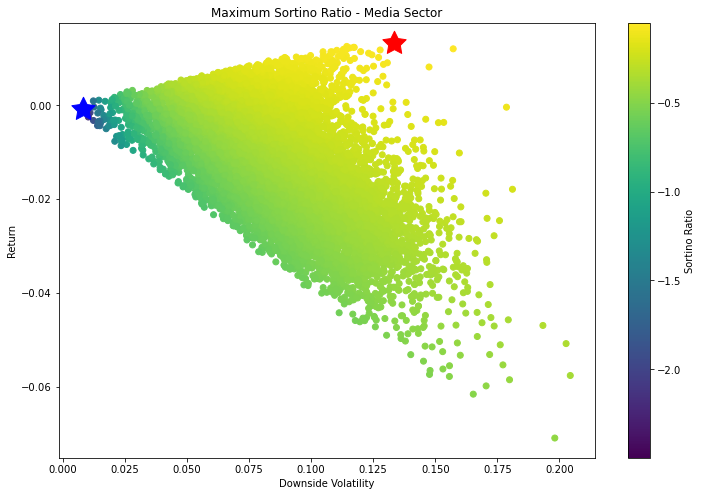

In [25]:
plt.figure(figsize=(12,8))
plt.scatter(x=result['Downside SD'],y=result['Mean'],c=result['Sortino'],cmap='viridis')
plt.colorbar(label='Sortino Ratio')
plt.xlabel('Downside Volatility')
plt.ylabel('Return')

plt.title('Maximum Sortino Ratio - Media Sector')
#Plot a red star to highlight position of the portfolio with highest Sortino Ratio
plt.scatter(Max_Sortino[1],Max_Sortino[0],marker=(5,1,0),color='r',s=600)
plt.scatter(Min_DSD[1],Min_DSD[0],marker=(5,1,0),color='b',s=600)

plt.show()

In [18]:
# Portfolio with the maximum Sharpe Ratio
w_raw = [0.0472, 0.0689, 0.1429, 0.3483, 0.0259, 0.1452, 0.0366, 0.0905, 0.0946]
#w_eigen = [i * 100 for i in w_raw]
print(w_raw)

w_1 = pd.DataFrame(w_raw, index = ['ZEEL.NS', 'PVR.NS', 'SUNTV.NS', 'SAREGAMA.NS', 'TV18BRDCST.NS',
         'INOXLEISUR.NS', 'DISHTV.NS', 'NETWORK18.NS', 'HATHWAY.NS'])
w_1.columns = ['weights']
w_1

[0.0472, 0.0689, 0.1429, 0.3483, 0.0259, 0.1452, 0.0366, 0.0905, 0.0946]


weights
ZEEL.NS         0.0472
PVR.NS          0.0689
SUNTV.NS        0.1429
SAREGAMA.NS     0.3483
TV18BRDCST.NS   0.0259
INOXLEISUR.NS   0.1452
DISHTV.NS       0.0366
NETWORK18.NS    0.0905
HATHWAY.NS      0.0946

In [19]:
# Portfolio with the maximum Sortino Ratio
w_raw = [0.0029, 0.2366, 0.3008, 0.1438, 0.0113, 0.0417, 0.1037, 0.0844, 0.0748]
#w_eigen = [i * 100 for i in w_raw]
# print(w_raw)

w_2 = pd.DataFrame(w_raw, index = ['ZEEL.NS', 'PVR.NS', 'SUNTV.NS', 'SAREGAMA.NS', 'TV18BRDCST.NS',
         'INOXLEISUR.NS', 'DISHTV.NS', 'NETWORK18.NS', 'HATHWAY.NS'])
w_2.columns = ['weights']
w_2

weights
ZEEL.NS         0.0029
PVR.NS          0.2366
SUNTV.NS        0.3008
SAREGAMA.NS     0.1438
TV18BRDCST.NS   0.0113
INOXLEISUR.NS   0.0417
DISHTV.NS       0.1037
NETWORK18.NS    0.0844
HATHWAY.NS      0.0748

In [20]:
# Portfolio with the maximum Calmar Ratio
w_raw = [0.0010, 0.3665, 0.0812, 0.0537, 0.1955, 0.0873, 0.0937, 0.0078, 0.1132]
w_3 = pd.DataFrame(w_raw, index= ['ZEEL.NS', 'PVR.NS', 'SUNTV.NS', 'SAREGAMA.NS', 'TV18BRDCST.NS',
         'INOXLEISUR.NS', 'DISHTV.NS', 'NETWORK18.NS', 'HATHWAY.NS'])
w_3.columns = ['weights']
w_3

weights
ZEEL.NS         0.0010
PVR.NS          0.3665
SUNTV.NS        0.0812
SAREGAMA.NS     0.0537
TV18BRDCST.NS   0.1955
INOXLEISUR.NS   0.0873
DISHTV.NS       0.0937
NETWORK18.NS    0.0078
HATHWAY.NS      0.1132

In [22]:
frames = [w_1, w_2, w_3]
  
result_1 = pd.concat(frames,axis=1)
#result.rename(columns={"weights": "HRP", "weights": "HERC", "weights": "EIGEN"}, inplace=True)
df_port = result_1.set_axis(['Sharpe Ratio', 'Sortino Ratio', 'Calmar Ratio'], axis=1, inplace=False)
#df3 =df3/100
display(df_port)

Sharpe Ratio  Sortino Ratio  Calmar Ratio
ZEEL.NS              0.0472         0.0029        0.0010
PVR.NS               0.0689         0.2366        0.3665
SUNTV.NS             0.1429         0.3008        0.0812
SAREGAMA.NS          0.3483         0.1438        0.0537
TV18BRDCST.NS        0.0259         0.0113        0.1955
INOXLEISUR.NS        0.1452         0.0417        0.0873
DISHTV.NS            0.0366         0.1037        0.0937
NETWORK18.NS         0.0905         0.0844        0.0078
HATHWAY.NS           0.0946         0.0748        0.1132

In [25]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30, 20))
ax1.pie(df_port.iloc[:,0], labels= df_port.index, autopct='%.2f', textprops={'fontsize': 15});
ax1.set_title('Portfoio with Max Sharpe Ratio',fontsize = 30)
ax2.pie(df_port.iloc[:,1], labels=df_port.index, autopct='%.2f', textprops={'fontsize': 15});
ax2.set_title('Portfolio with Max Sortino Ratio',fontsize = 30)
ax3.pie(df_port.iloc[:,2], labels=df_port.index, autopct='%.2f', textprops={'fontsize': 15});
ax3.set_title('Portfolio with Max Calmar Ratio', fontsize = 30)
#portfolios.plot.pie(subplots=True, figsize=(20, 10),legend = False);

Text(0.5, 1.0, 'Portfolio with Max Calmar Ratio')

In [26]:
df_training.shape

(987, 9)

In [27]:
Insample_Result=pd.DataFrame(np.dot(df_training, np.array(df_port)), \
                             columns=['Max Sharpe Ratio Portfolio', 'Max Sortino Ratio Portfolio', 'Max Calmar Ratio Portfolio'], index = df_training.index)
OutOfSample_Result=pd.DataFrame(np.dot(df_test,np.array(df_port)), \
                                columns=['Max Sharpe Ratio Portfolio', 'Max Sortino Ratio Portfolio', 'Max Calmar Portfolio'], index = df_test.index)

In [28]:
Insample_Result.head(20)

Max Sharpe Ratio Portfolio  Max Sortino Ratio Portfolio  \
Date                                                                  
2017-01-03                    0.025132                     0.025115   
2017-01-04                    0.012447                     0.006697   
2017-01-05                    0.004769                     0.009343   
2017-01-06                   -0.012666                    -0.008138   
2017-01-09                   -0.002638                     0.003694   
2017-01-10                    0.005942                     0.007748   
2017-01-11                    0.008238                     0.006037   
2017-01-12                   -0.004001                    -0.006997   
2017-01-13                    0.014937                     0.002247   
2017-01-16                   -0.002551                     0.005520   
2017-01-17                   -0.008719                    -0.003098   
2017-01-18                    0.009777                     0.013433   
2017-01-19                    0.016196                     0.008628   
2017-01-20                   -0.013936                    -0.018843   
2017-01-23                    0.009037                     0.005163   
2017-01-24                    0.001592                     0.007630   
2017-01-25                    0.001185                     0.007150   
2017-01-27                   -0.020344                    -0.009645   
2017-01-30                   -0.004453                    -0.006503   
2017-01-31                   -0.019573                    -0.017632   

            Max Calmar Ratio Portfolio  
Date                                    
2017-01-03                    0.016557  
2017-01-04                    0.003057  
2017-01-05                    0.008505  
2017-01-06                   -0.007592  
2017-01-09                    0.003701  
2017-01-10                    0.010274  
2017-01-11                    0.010663  
2017-01-12                   -0.015274  
2017-01-13                    0.000646  
2017-01-16                    0.010153  
2017-01-17                   -0.003056  
2017-01-18                    0.020312  
2017-01-19                    0.005963  
2017-01-20                   -0.019515  
2017-01-23                    0.007336  
2017-01-24                    0.006623  
2017-01-25                    0.002671  
2017-01-27                   -0.010095  
2017-01-30                   -0.008470  
2017-01-31                   -0.018767

In [29]:
OutOfSample_Result

Max Sharpe Ratio Portfolio  Max Sortino Ratio Portfolio  \
Date                                                                  
2021-01-01                    0.002512                     0.003282   
2021-01-04                    0.013815                     0.020491   
2021-01-05                    0.022883                     0.007485   
2021-01-06                   -0.000230                    -0.001032   
2021-01-07                    0.006815                     0.018332   
...                                ...                          ...   
2021-12-27                    0.007467                     0.008751   
2021-12-28                   -0.000521                    -0.004176   
2021-12-29                   -0.004615                    -0.010922   
2021-12-30                   -0.003274                    -0.000328   
2021-12-31                    0.007877                     0.012786   

            Max Calmar Portfolio  
Date                              
2021-01-01              0.007321  
2021-01-04              0.021459  
2021-01-05              0.006187  
2021-01-06              0.006984  
2021-01-07              0.003620  
...                          ...  
2021-12-27              0.002833  
2021-12-28             -0.008832  
2021-12-29             -0.011427  
2021-12-30             -0.001778  
2021-12-31              0.014761  

[248 rows x 3 columns]

<AxesSubplot:xlabel='Date', ylabel='Return'>

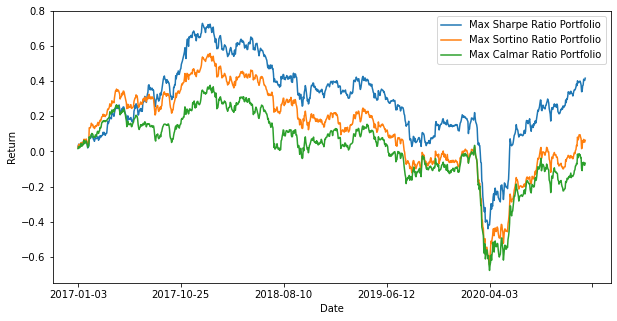

In [30]:
Insample_Result.cumsum().plot(figsize=(10, 5), ylabel = "Return")
OutOfSample_Result.cumsum().plot(figsize=(10, 5), ylabel = "Return")

In [31]:
ret_insample=Insample_Result.mean() * 252
ret_insample

Max Sharpe Ratio Portfolio     0.106724
Max Sortino Ratio Portfolio    0.016238
Max Calmar Ratio Portfolio    -0.017045
dtype: float64

In [32]:
ret_out_of_sample = OutOfSample_Result.mean() * 252
ret_out_of_sample

Max Sharpe Ratio Portfolio     0.779959
Max Sortino Ratio Portfolio    0.381194
Max Calmar Portfolio           0.184102
dtype: float64